<h1>Analyzing New York City 311 Customer Service from 2016 to Present</h1>


In [2]:
#import pandas library aliased as pd 
import pandas as pd
# Initialize df variable as dataframe
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


## 1. Import the dataset stored in 'Customer Service_Requests_from_2010_to_Present.csv'

In [4]:
#store csv data into a data frame
df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory=False)
#print first few data in the dataframe
print(df.head())

   Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Side

## 2. Provide insight on the information and details that the provided dataset carries.

In [6]:
# Information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
# Dimension of the dataframe
print(f'Dimension: {df.shape}')

Dimension: (300698, 53)


In [8]:
# Description of the dataframe
df.describe()

Unique Key   Incident Zip  X Coordinate (State Plane)  \
count  3.006980e+05  298083.000000                2.971580e+05   
mean   3.130054e+07   10848.888645                1.004854e+06   
std    5.738547e+05     583.182081                2.175338e+04   
min    3.027948e+07      83.000000                9.133570e+05   
25%    3.080118e+07   10310.000000                9.919752e+05   
50%    3.130436e+07   11208.000000                1.003158e+06   
75%    3.178446e+07   11238.000000                1.018372e+06   
max    3.231065e+07   11697.000000                1.067173e+06   

       Y Coordinate (State Plane)  School or Citywide Complaint  Vehicle Type  \
count               297158.000000                           0.0           0.0   
mean                203754.534416                           NaN           NaN   
std                  29880.183529                           NaN           NaN   
min                 121219.000000                           NaN           NaN   
25%                 183343.000000                           NaN           NaN   
50%                 201110.500000                           NaN           NaN   
75%                 224125.250000                           NaN           NaN   
max                 271876.000000                           NaN           NaN   

       Taxi Company Borough  Taxi Pick Up Location  Garage Lot Name  \
count                   0.0                    0.0              0.0   
mean                    NaN                    NaN              NaN   
std                     NaN                    NaN              NaN   
min                     NaN                    NaN              NaN   
25%                     NaN                    NaN              NaN   
50%                     NaN                    NaN              NaN   
75%                     NaN                    NaN              NaN   
max                     NaN                    NaN              NaN   

            Latitude      Longitude  
count  297158.000000  297158.000000  
mean       40.725885     -73.925630  
std         0.082012       0.078454  
min        40.499135     -74.254937  
25%        40.669796     -73.972142  
50%        40.718661     -73.931781  
75%        40.781840     -73.876805  
max        40.912869     -73.700760

## 3. Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing.

#### Converting 'Created Date' and 'Closed Date' column to datetime

In [11]:
# Print 'Created Date' column data type
print("'Created Date' Data type: " + str(df['Created Date'].dtype))

# Print 'Closed Date' data type
print("'Closed Date' Data type: " + str(df['Closed Date'].dtype))

'Created Date' Data type: object
'Closed Date' Data type: object


In [12]:
#convert Created Date column to date time 
df['Created Date'] = pd.to_datetime(df['Created Date'], dayfirst=True, format="mixed")

#convert Closed Date column to date time 
df['Closed Date'] = pd.to_datetime(df['Closed Date'], dayfirst=True, format="mixed")

In [13]:
# Print 'Created Date' column data type
print("'Created Date' Data type: " + str(df['Created Date'].dtype))

# Print 'Closed Date' data type
print("'Closed Date' Data type: " + str(df['Closed Date'].dtype))

'Created Date' Data type: datetime64[ns]
'Closed Date' Data type: datetime64[ns]


#### New column creation: 'Request_Closing_Time'

In [15]:
# Creating new column Request_Closing_Time 
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

In [16]:
# Output of the changed columns
df[['Created Date', 'Closed Date', 'Request_Closing_Time']]

Created Date         Closed Date Request_Closing_Time
0      2015-12-31 23:59:45 2016-01-01 00:55:00      0 days 00:55:15
1      2015-12-31 23:59:44 2016-01-01 01:26:00      0 days 01:26:16
2      2015-12-31 23:59:29 2016-01-01 04:51:00      0 days 04:51:31
3      2015-12-31 23:57:46 2016-01-01 07:43:00      0 days 07:45:14
4      2015-12-31 23:56:58 2016-01-01 03:24:00      0 days 03:27:02
...                    ...                 ...                  ...
300693 2015-03-29 00:33:41                 NaT                  NaT
300694 2015-03-29 00:33:28 2015-03-29 02:33:59      0 days 02:00:31
300695 2015-03-29 00:33:03 2015-03-29 03:40:20      0 days 03:07:17
300696 2015-03-29 00:33:02 2015-03-29 04:38:35      0 days 04:05:33
300697 2015-03-29 00:33:01 2015-03-29 04:41:50      0 days 04:08:49

[300698 rows x 3 columns]

## 4. Drop irrelevant Columns which are stored below in column_names.

In [18]:
# Store column names in a variable
column_names = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name','Park Borough',
    'School Name', 'School Number','School Region','School Code','School Phone Number','School Address',
    'School City','School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
    'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
    'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
    'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date',
    'Community Board','Facility Type','Location']

In [19]:
# Display all columns in df
print("Column Name")
print("_" * 40)
for column in df.columns:
    print(column)

Column Name
________________________________________
Unique Key
Created Date
Closed Date
Agency
Agency Name
Complaint Type
Descriptor
Location Type
Incident Zip
Incident Address
Street Name
Cross Street 1
Cross Street 2
Intersection Street 1
Intersection Street 2
Address Type
City
Landmark
Facility Type
Status
Due Date
Resolution Description
Resolution Action Updated Date
Community Board
Borough
X Coordinate (State Plane)
Y Coordinate (State Plane)
Park Facility Name
Park Borough
School Name
School Number
School Region
School Code
School Phone Number
School Address
School City
School State
School Zip
School Not Found
School or Citywide Complaint
Vehicle Type
Taxi Company Borough
Taxi Pick Up Location
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Garage Lot Name
Ferry Direction
Ferry Terminal Name
Latitude
Longitude
Location
Request_Closing_Time


In [20]:
# Display total columns in df
print("Total columns: ", len(df.columns))

Total columns:  54


In [21]:
# Modify the dataframe 'df' by dropping all columns listed in the variable
df.drop(columns=column_names, inplace=True)

In [22]:
# Display all columns in df
print("Column Name")
print("_" * 40)
for column in df.columns:
    print(column)

Column Name
________________________________________
Unique Key
Created Date
Closed Date
Agency
Complaint Type
Descriptor
Location Type
Incident Zip
City
Status
Resolution Description
Borough
Latitude
Longitude
Request_Closing_Time


In [23]:
# Display total columns in df
print("Total columns: ", len(df.columns))

Total columns:  15


## 5. Remove the NaN missing values from updated dataframe.

In [25]:
# Few datas from the last 
df.tail()

Unique Key        Created Date         Closed Date Agency  \
300693    30281872 2015-03-29 00:33:41                 NaT   NYPD   
300694    30281230 2015-03-29 00:33:28 2015-03-29 02:33:59   NYPD   
300695    30283424 2015-03-29 00:33:03 2015-03-29 03:40:20   NYPD   
300696    30280004 2015-03-29 00:33:02 2015-03-29 04:38:35   NYPD   
300697    30281825 2015-03-29 00:33:01 2015-03-29 04:41:50   NYPD   

            Complaint Type        Descriptor        Location Type  \
300693  Noise - Commercial  Loud Music/Party  Club/Bar/Restaurant   
300694    Blocked Driveway    Partial Access      Street/Sidewalk   
300695  Noise - Commercial  Loud Music/Party  Club/Bar/Restaurant   
300696  Noise - Commercial  Loud Music/Party  Club/Bar/Restaurant   
300697  Noise - Commercial  Loud Music/Party     Store/Commercial   

        Incident Zip           City  Status  \
300693           NaN            NaN    Open   
300694       11418.0  RICHMOND HILL  Closed   
300695       11206.0       BROOKLYN  Closed   
300696       10461.0          BRONX  Closed   
300697       10036.0       NEW YORK  Closed   

                                   Resolution Description      Borough  \
300693  Your complaint has been forwarded to the New Y...  Unspecified   
300694  The Police Department responded and upon arriv...       QUEENS   
300695  The Police Department responded to the complai...     BROOKLYN   
300696  The Police Department responded to the complai...        BRONX   
300697  The Police Department responded to the complai...    MANHATTAN   

         Latitude  Longitude Request_Closing_Time  
300693        NaN        NaN                  NaT  
300694  40.694077 -73.846087      0 days 02:00:31  
300695  40.699590 -73.944234      0 days 03:07:17  
300696  40.837708 -73.834587      0 days 04:05:33  
300697  40.760583 -73.985922      0 days 04:08:49

In [26]:
# Check missing values
print("Column Name\t\tTotal NaN")
df.isna().sum()

Column Name		Total NaN


Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64

In [27]:
# Modifying the dataframe 'df' by dropping all the NaN/NaT value rows
df.dropna(inplace=True)

In [28]:
# Check missing values
print("Column Name\t\tTotal NaN")
df.isna().sum()

Column Name		Total NaN


Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

In [29]:
# Updated data shown from the last rows
df.tail()

Unique Key        Created Date         Closed Date Agency  \
300692    30281370 2015-03-29 00:34:32 2015-03-29 01:13:01   NYPD   
300694    30281230 2015-03-29 00:33:28 2015-03-29 02:33:59   NYPD   
300695    30283424 2015-03-29 00:33:03 2015-03-29 03:40:20   NYPD   
300696    30280004 2015-03-29 00:33:02 2015-03-29 04:38:35   NYPD   
300697    30281825 2015-03-29 00:33:01 2015-03-29 04:41:50   NYPD   

            Complaint Type        Descriptor        Location Type  \
300692  Noise - Commercial  Loud Music/Party     Store/Commercial   
300694    Blocked Driveway    Partial Access      Street/Sidewalk   
300695  Noise - Commercial  Loud Music/Party  Club/Bar/Restaurant   
300696  Noise - Commercial  Loud Music/Party  Club/Bar/Restaurant   
300697  Noise - Commercial  Loud Music/Party     Store/Commercial   

        Incident Zip           City  Status  \
300692       10002.0       NEW YORK  Closed   
300694       11418.0  RICHMOND HILL  Closed   
300695       11206.0       BROOKLYN  Closed   
300696       10461.0          BRONX  Closed   
300697       10036.0       NEW YORK  Closed   

                                   Resolution Description    Borough  \
300692  The Police Department responded to the complai...  MANHATTAN   
300694  The Police Department responded and upon arriv...     QUEENS   
300695  The Police Department responded to the complai...   BROOKLYN   
300696  The Police Department responded to the complai...      BRONX   
300697  The Police Department responded to the complai...  MANHATTAN   

         Latitude  Longitude Request_Closing_Time  
300692  40.716053 -73.991378      0 days 00:38:29  
300694  40.694077 -73.846087      0 days 02:00:31  
300695  40.699590 -73.944234      0 days 03:07:17  
300696  40.837708 -73.834587      0 days 04:05:33  
300697  40.760583 -73.985922      0 days 04:08:49

## 6. Show the unique values from all the columns in the dataframe.

In [31]:
# Loop through each column in dataframe
for column in df.columns:
    # Print column name, column data, total unique values
    print(f'Column Name: {column}')  
    print(f'Total Unique Values: {df[column].nunique()}')
    print(f'Unique Values: \n{df[column].unique()}')
    print('_' * 100)

Column Name: Unique Key
Total Unique Values: 291107
Unique Values: 
[32310363 32309934 32309159 ... 30283424 30280004 30281825]
____________________________________________________________________________________________________
Column Name: Created Date
Total Unique Values: 251970
Unique Values: 
<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]
____________________________________________________________________________________________________
Column Name: Closed Date
Total Unique Values: 231991
Unique Values: 
<Dat

## 7. Show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame.

In [34]:
# Set format as so it displays full value
pd.set_option('display.float_format', '{:,.2f}'.format)

# Request Closing Time in Hours
df['Request_Closing_Time_In_Hours'] = df['Request_Closing_Time'].dt.total_seconds() / 3600

# Calculate sum()
print("Sum Calculation:\nColumn Name\tSum")
df[[
    'Unique Key', 
    'Incident Zip', 
    'Latitude', 
    'Longitude', 
    'Request_Closing_Time_In_Hours'
]].sum()

Sum Calculation:
Column Name	Sum


Unique Key                      9,112,107,955,295.00
Incident Zip                        3,160,833,212.00
Latitude                               11,855,530.76
Longitude                             -21,520,095.17
Request_Closing_Time_In_Hours           2,242,774.45
dtype: float64

In [36]:
# Calculate mean
print("Mean Calculation:\nColumn Name\tMean")
df[[
    'Unique Key', 
    'Incident Zip', 
    'Latitude', 
    'Longitude', 
    'Request_Closing_Time'
]].mean()

Mean Calculation:
Column Name	Mean


Unique Key                          31,301,576.24
Incident Zip                            10,857.98
Latitude                                    40.73
Longitude                                  -73.93
Request_Closing_Time    0 days 07:42:15.464980230
dtype: object

In [38]:
# Set format back to default
pd.reset_option('display.float_format')

In [40]:
# Calculate standard deviation
print("Standard Deviation Calculation:\nColumn Name\tStd")
df.std(numeric_only=True)

Standard Deviation Calculation:
Column Name	Std


Unique Key                       575377.738707
Incident Zip                        580.280774
Latitude                              0.082411
Longitude                             0.078654
Request_Closing_Time_In_Hours       567.208468
dtype: float64

In [42]:
# Calculate Skewness
print("Skewness Calculation:\nColumn Name\tSkewness")
df.skew(numeric_only=True)

Skewness Calculation:
Column Name	Skewness


Unique Key                       0.016898
Incident Zip                    -2.553956
Latitude                         0.123114
Longitude                       -0.312739
Request_Closing_Time_In_Hours   -8.142360
dtype: float64

In [44]:
# Calculate Kurtosis
print("Kurtosis Calculation:\nColumn Name\tKurtosis")
df.kurt(numeric_only=True)

Kurtosis Calculation:
Column Name	Kurtosis


Unique Key                       -1.176593
Incident Zip                     37.827777
Latitude                         -0.734818
Longitude                         1.455600
Request_Closing_Time_In_Hours    87.306717
dtype: float64

## 8. Calculate and show correlation of all variables.

In [47]:
# importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Filter relevant numeric columns
correlation_df = df[[
    'Unique Key', 
    'Incident Zip', 
    'Latitude', 
    'Longitude', 
    'Request_Closing_Time'
]]

In [49]:
# Compute correlation matrix
corr_matrix = correlation_df.corr()
corr_matrix

Unique Key  Incident Zip  Latitude  Longitude  \
Unique Key              1.000000      0.025492 -0.032613  -0.008621   
Incident Zip            0.025492      1.000000 -0.499081   0.385934   
Latitude               -0.032613     -0.499081  1.000000   0.368819   
Longitude              -0.008621      0.385934  0.368819   1.000000   
Request_Closing_Time    0.004666     -0.002069  0.002606   0.005605   

                      Request_Closing_Time  
Unique Key                        0.004666  
Incident Zip                     -0.002069  
Latitude                          0.002606  
Longitude                         0.005605  
Request_Closing_Time              1.000000

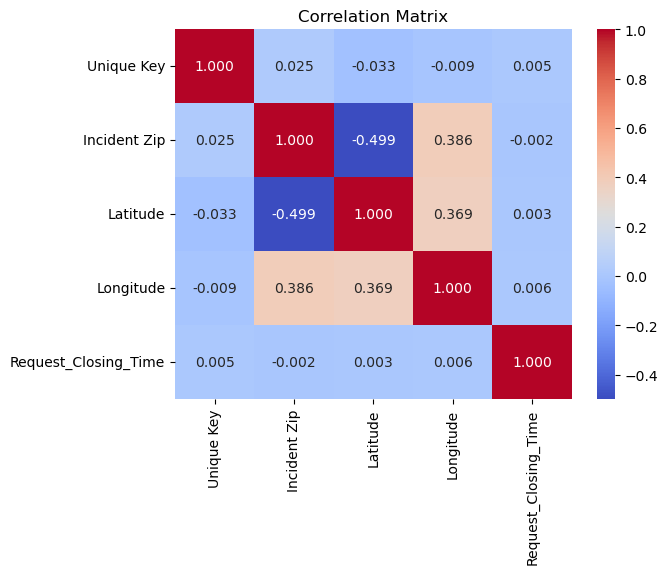

In [50]:
# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 9. Four major insights through visualization that you come up after data mining.

***INSIGHT 1: Spatial Density by Complaint Types***

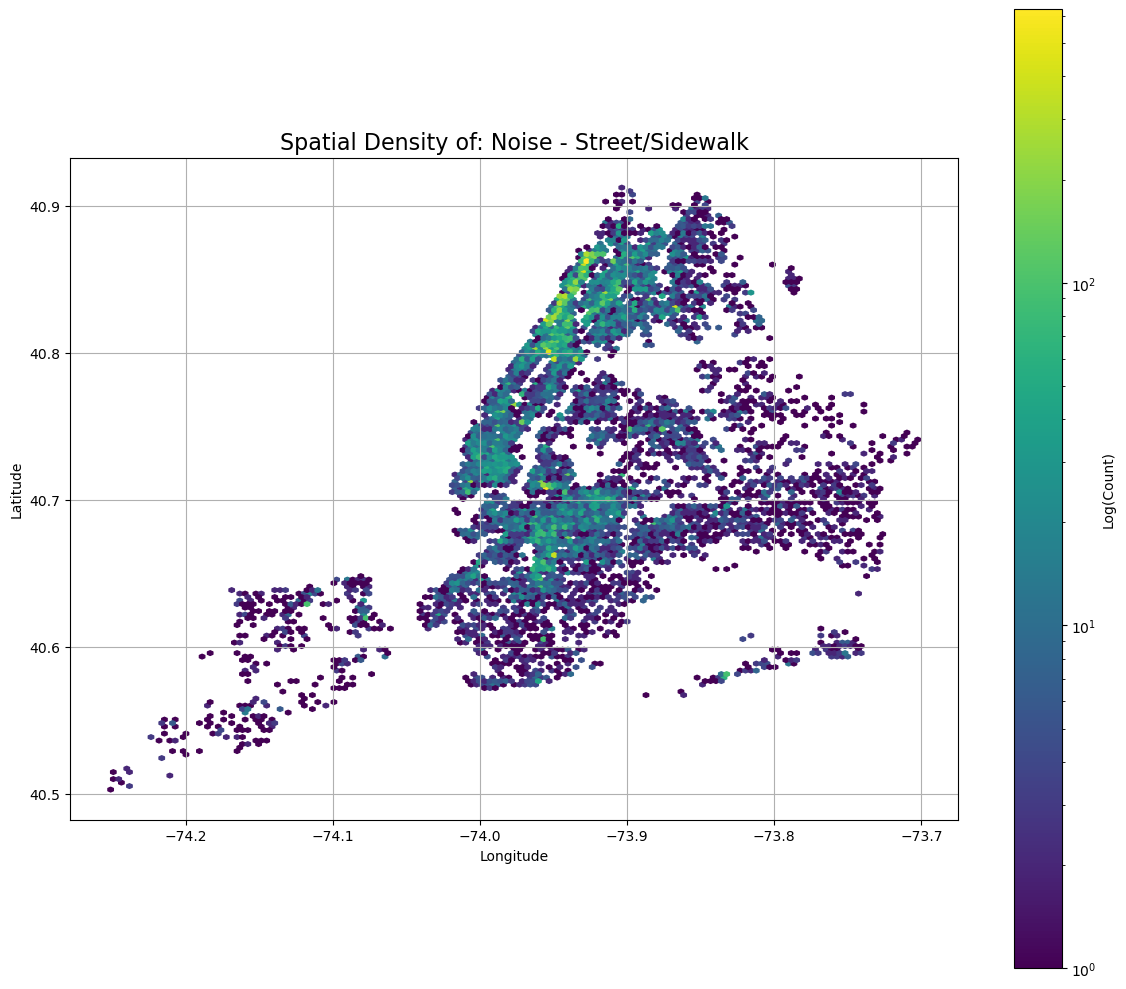

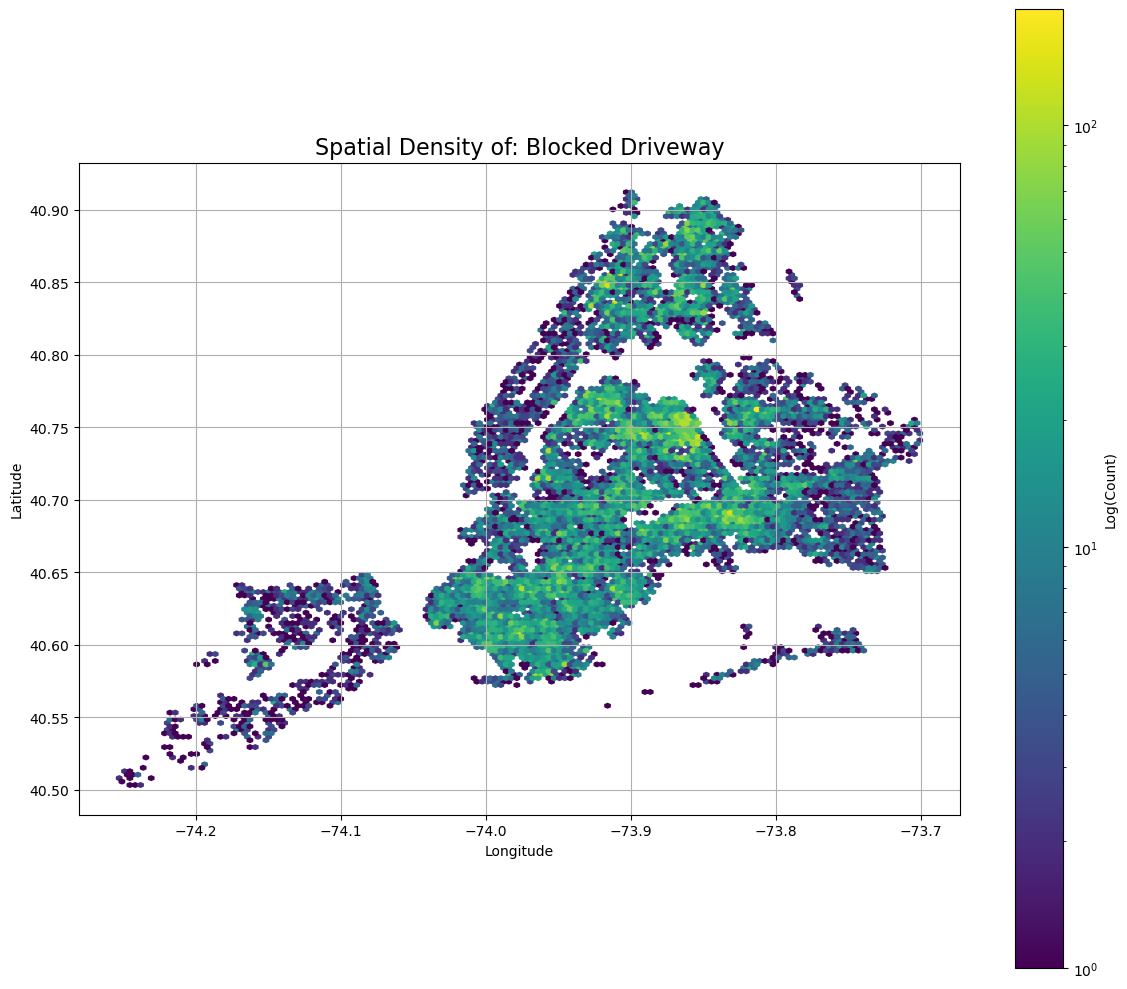

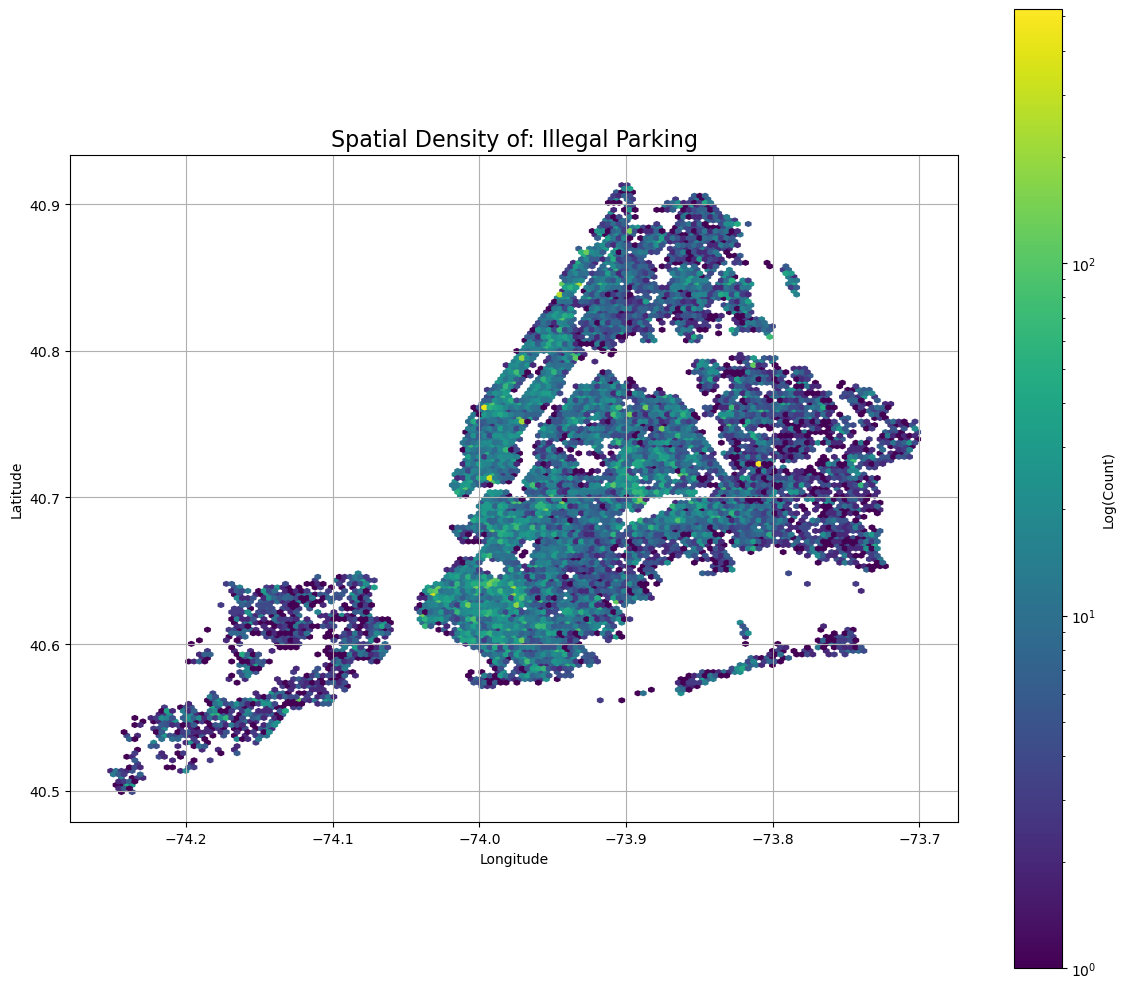

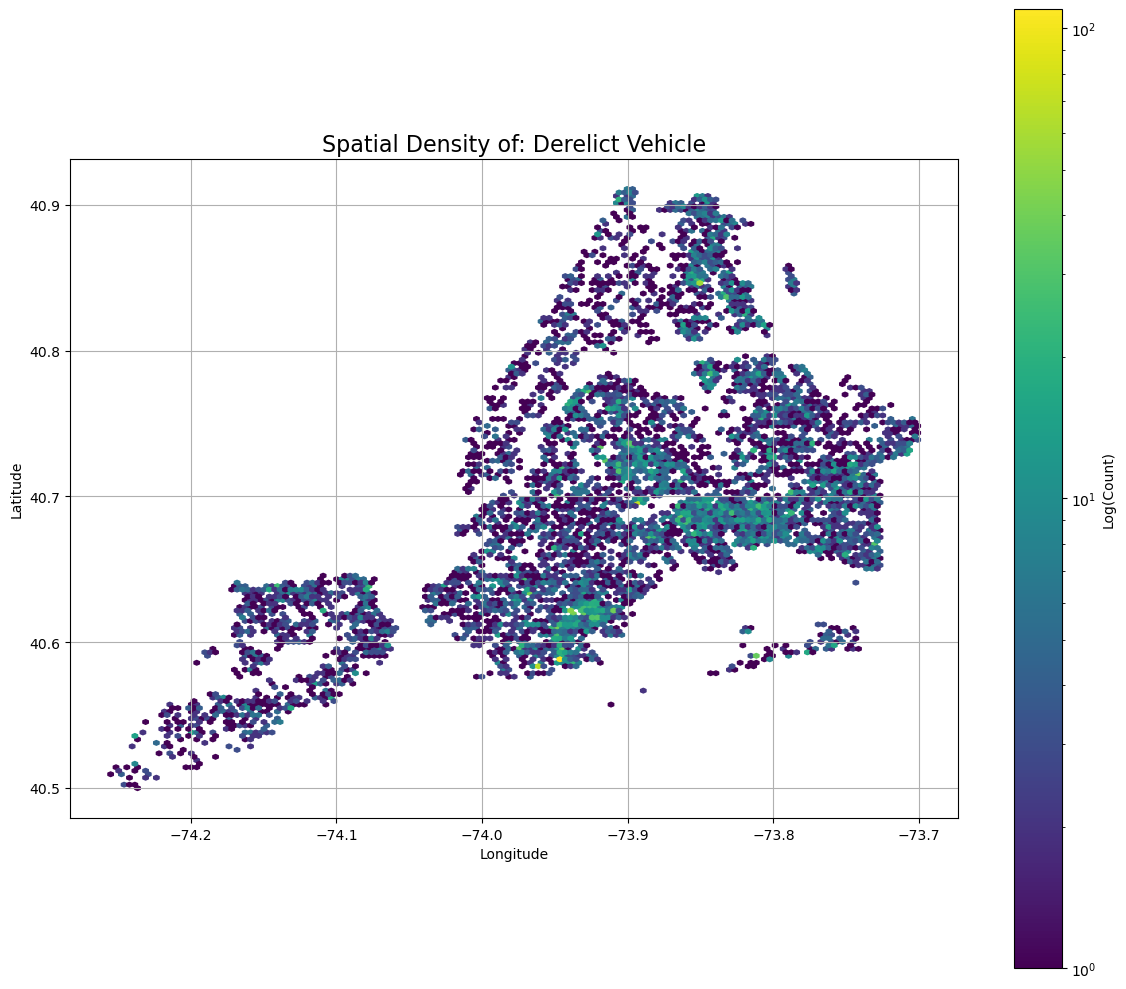

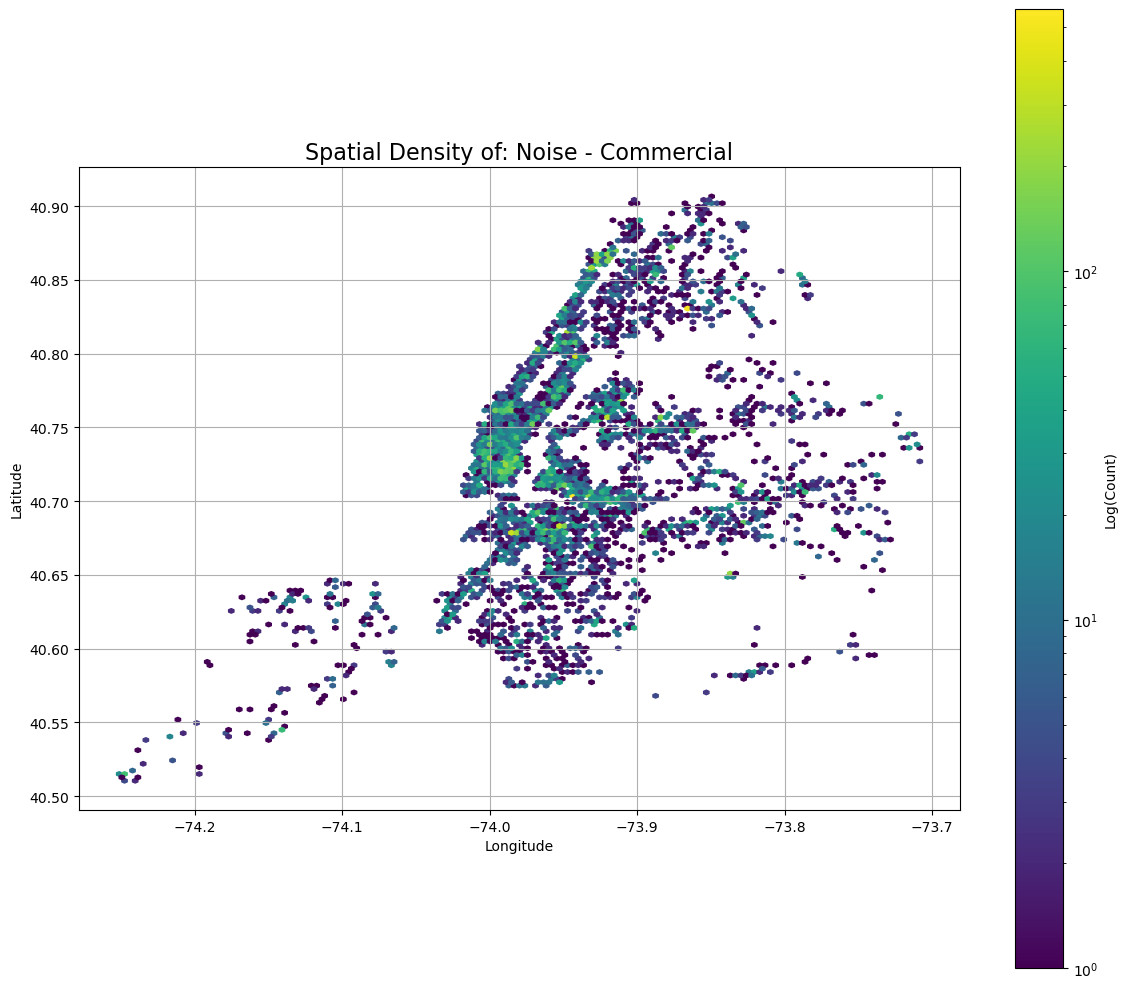

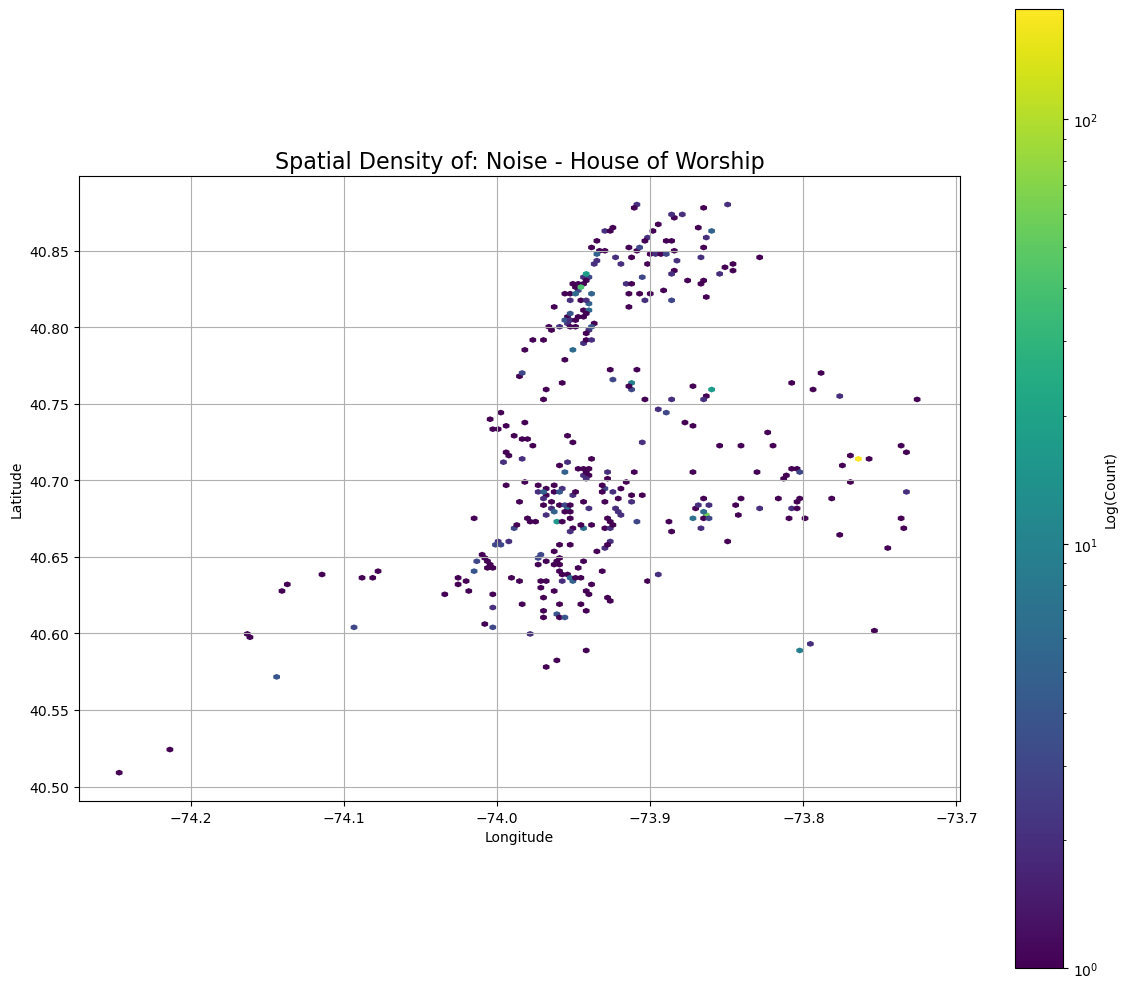

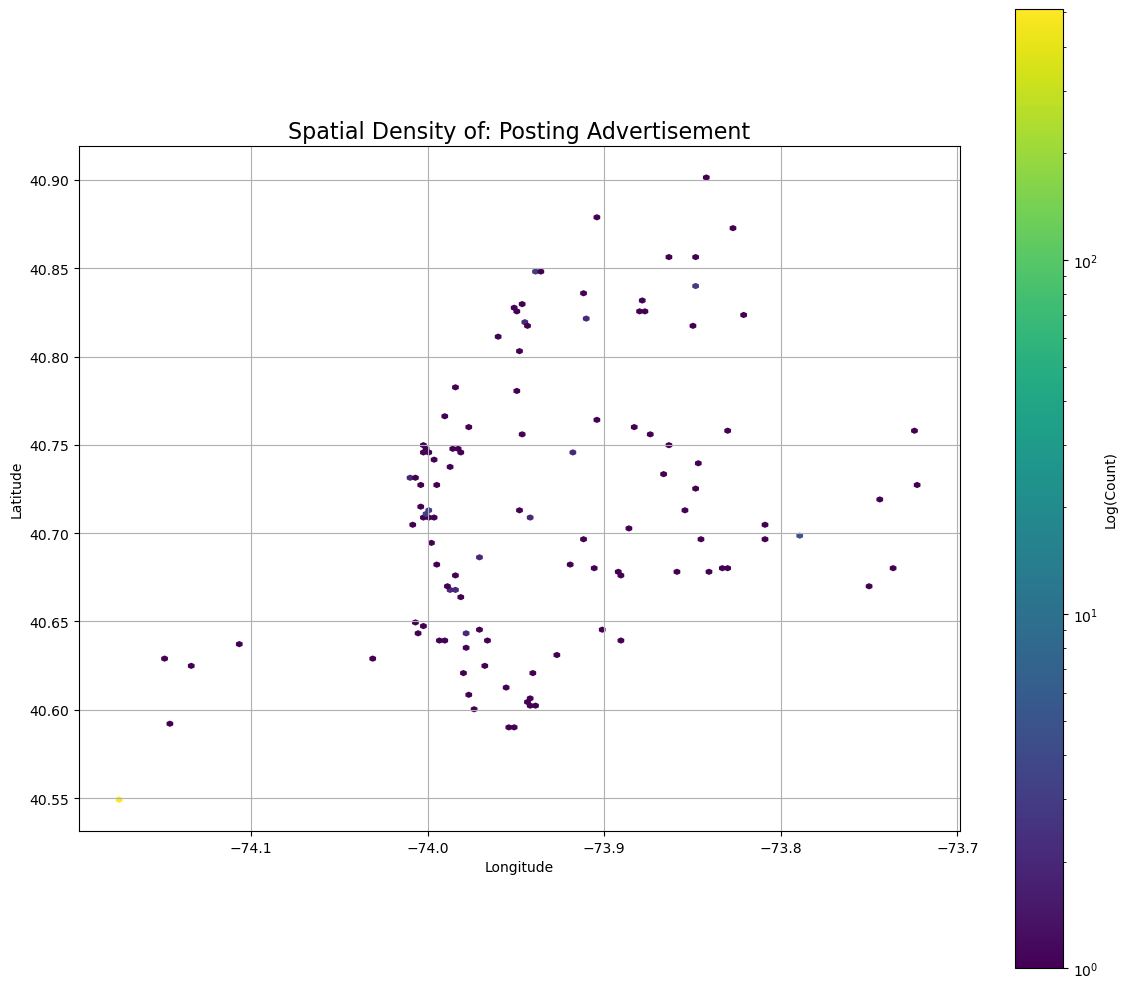

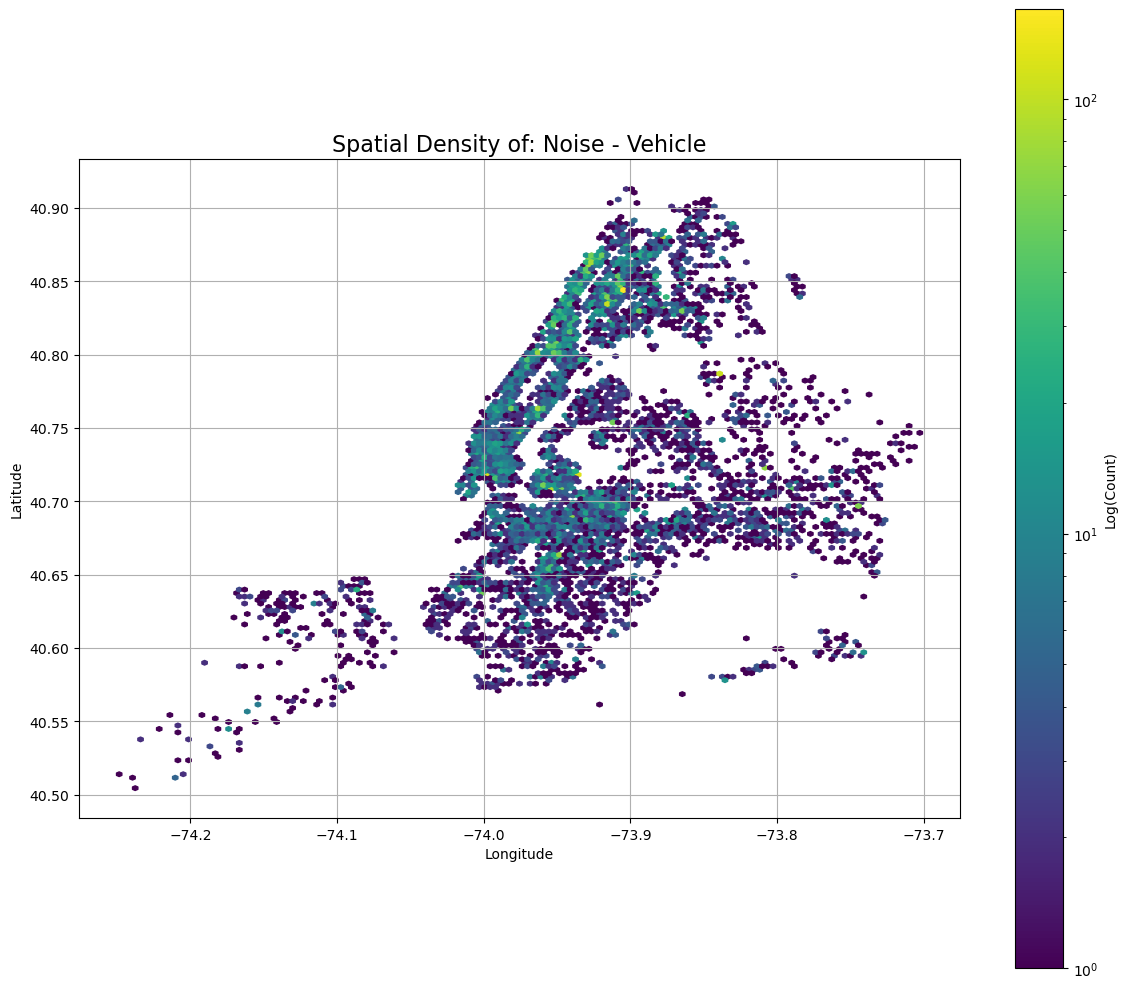

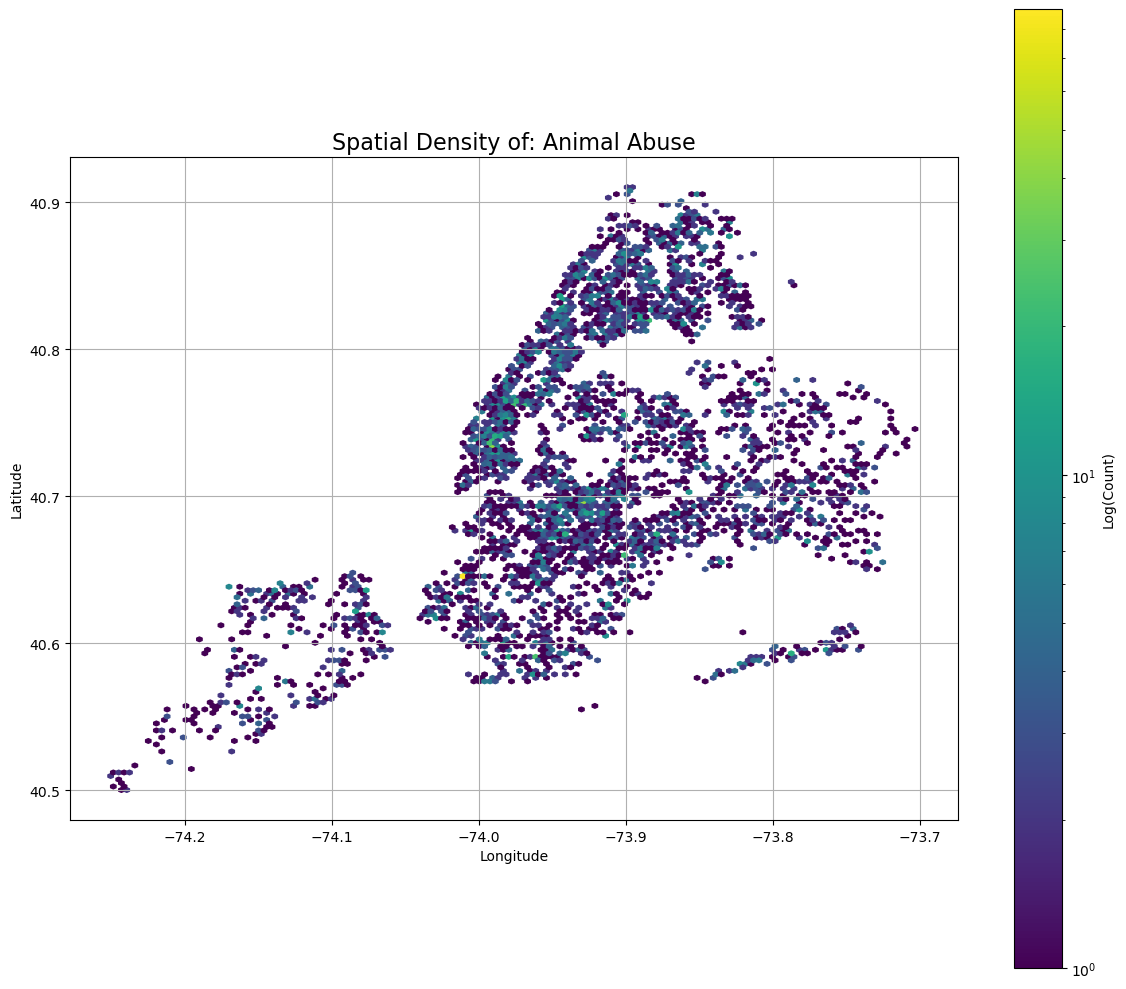

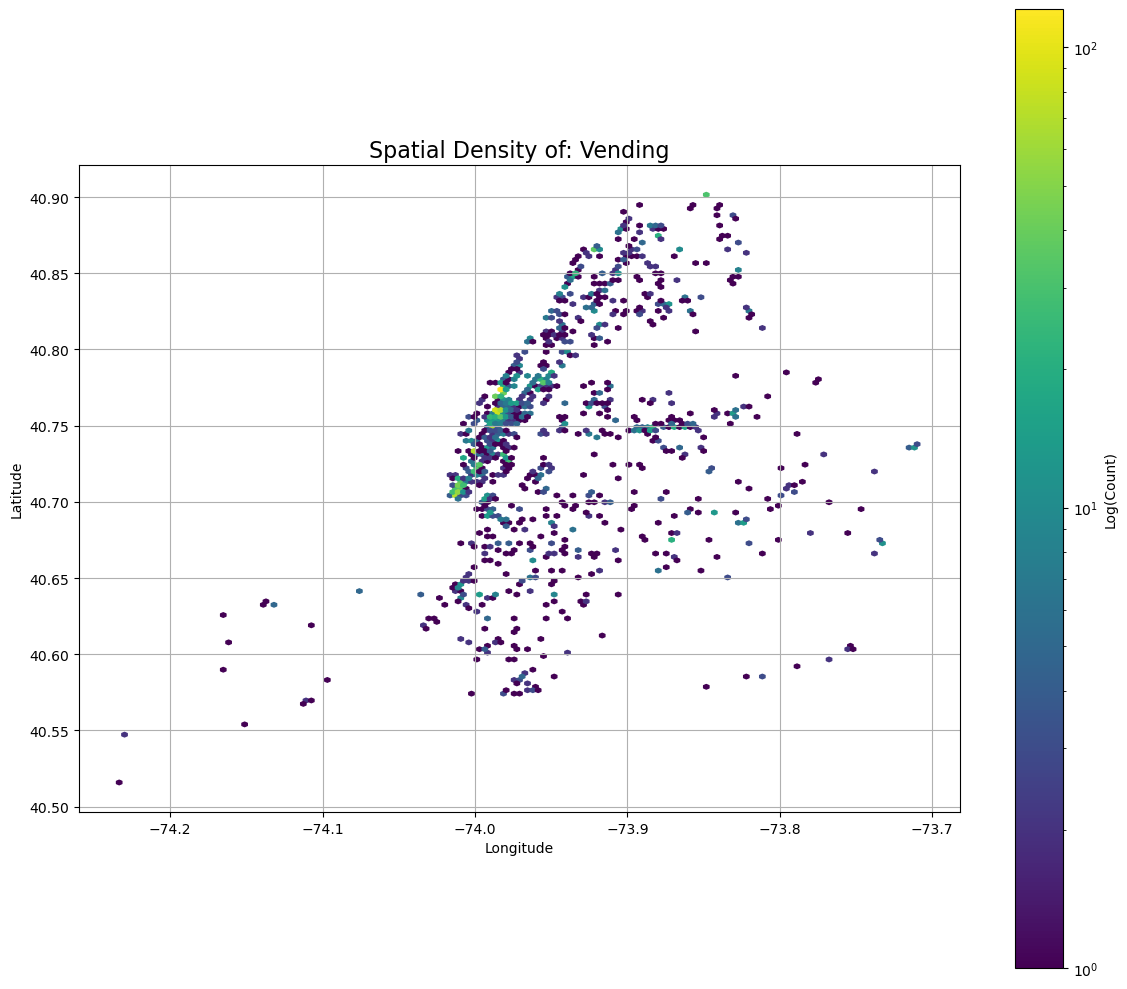

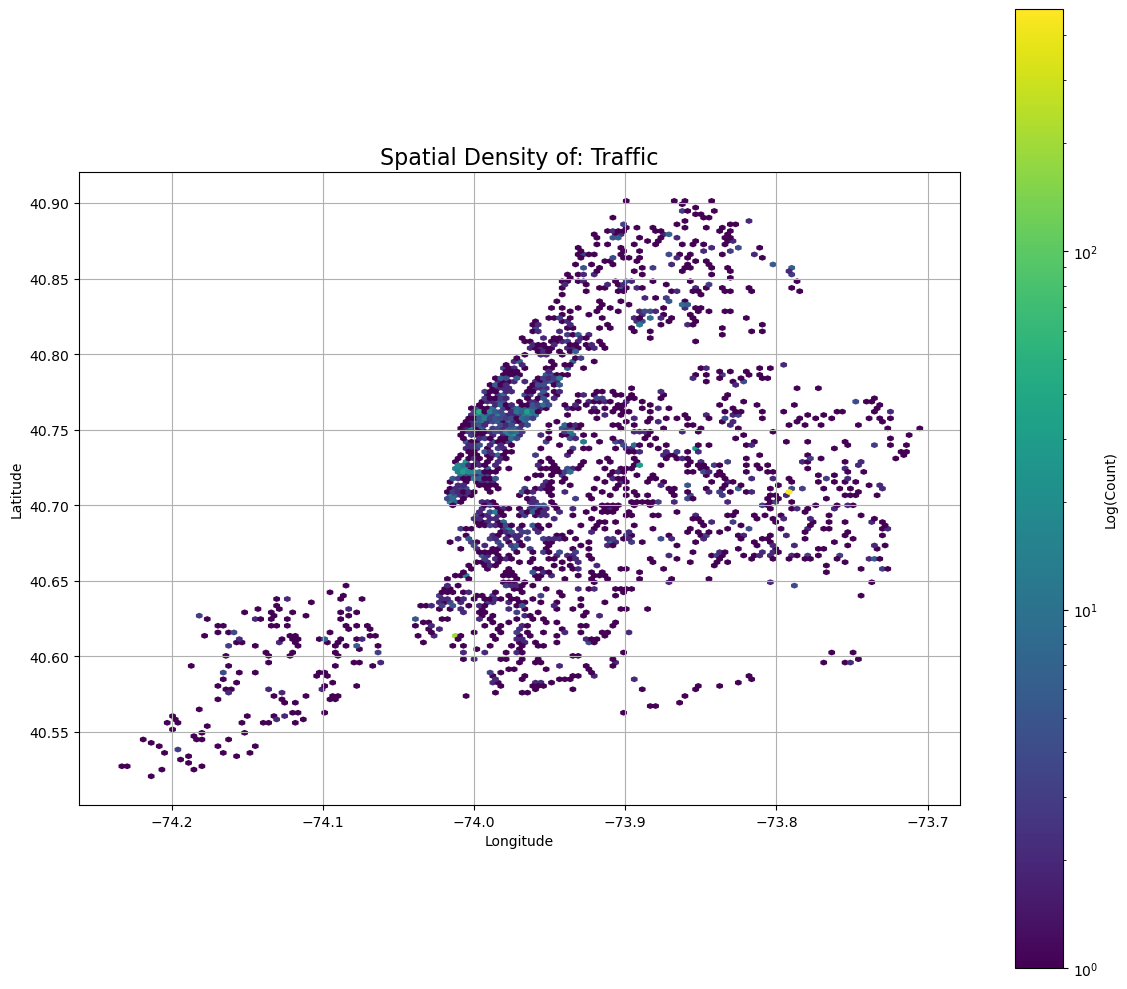

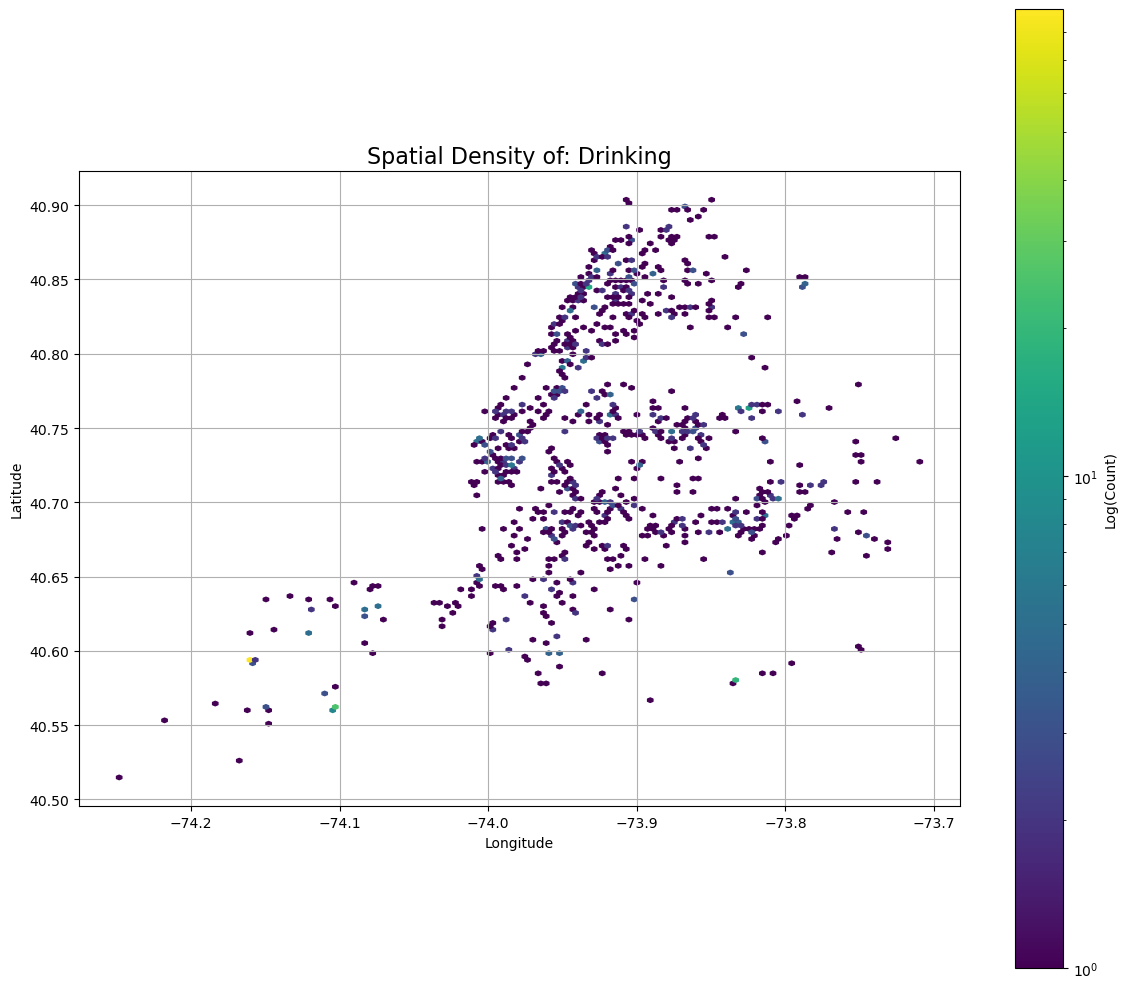

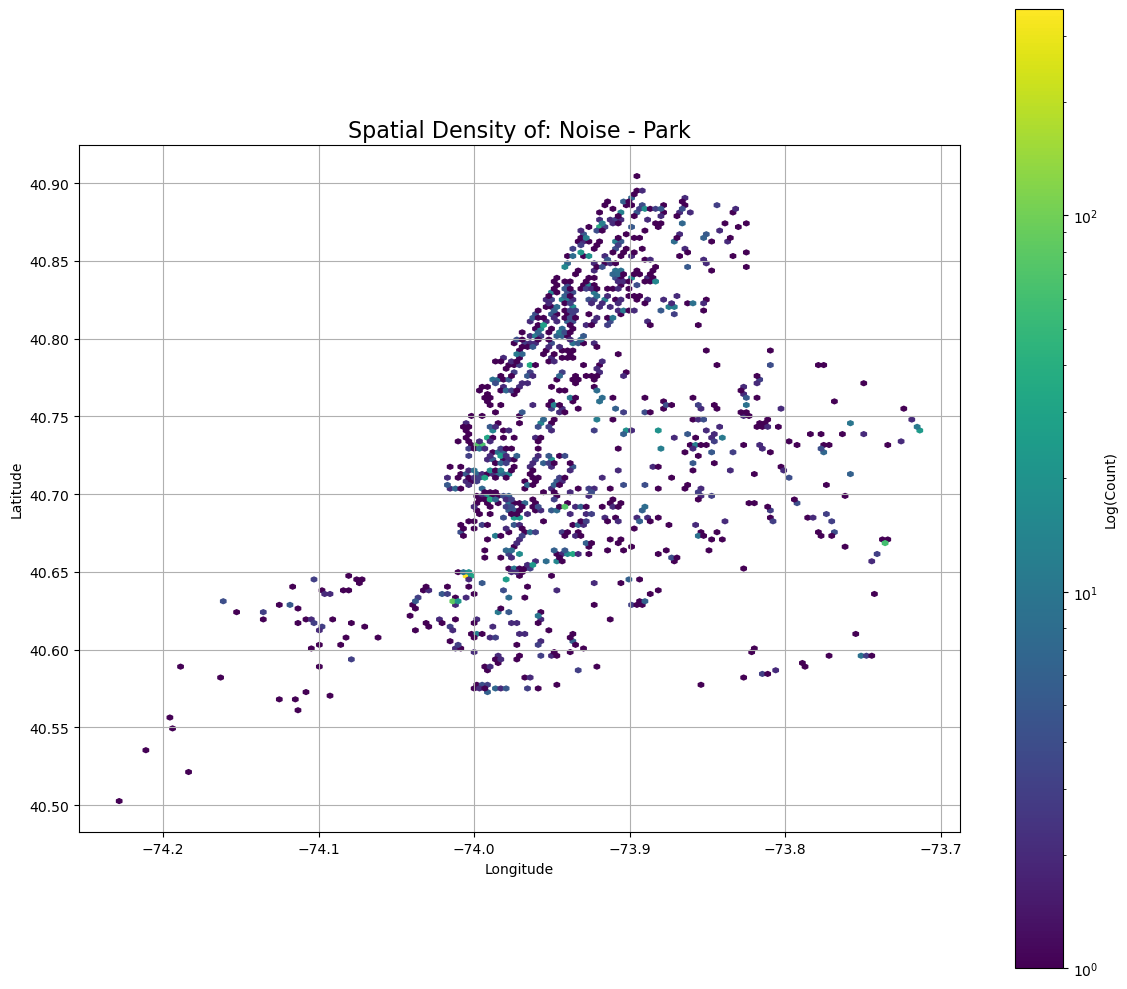

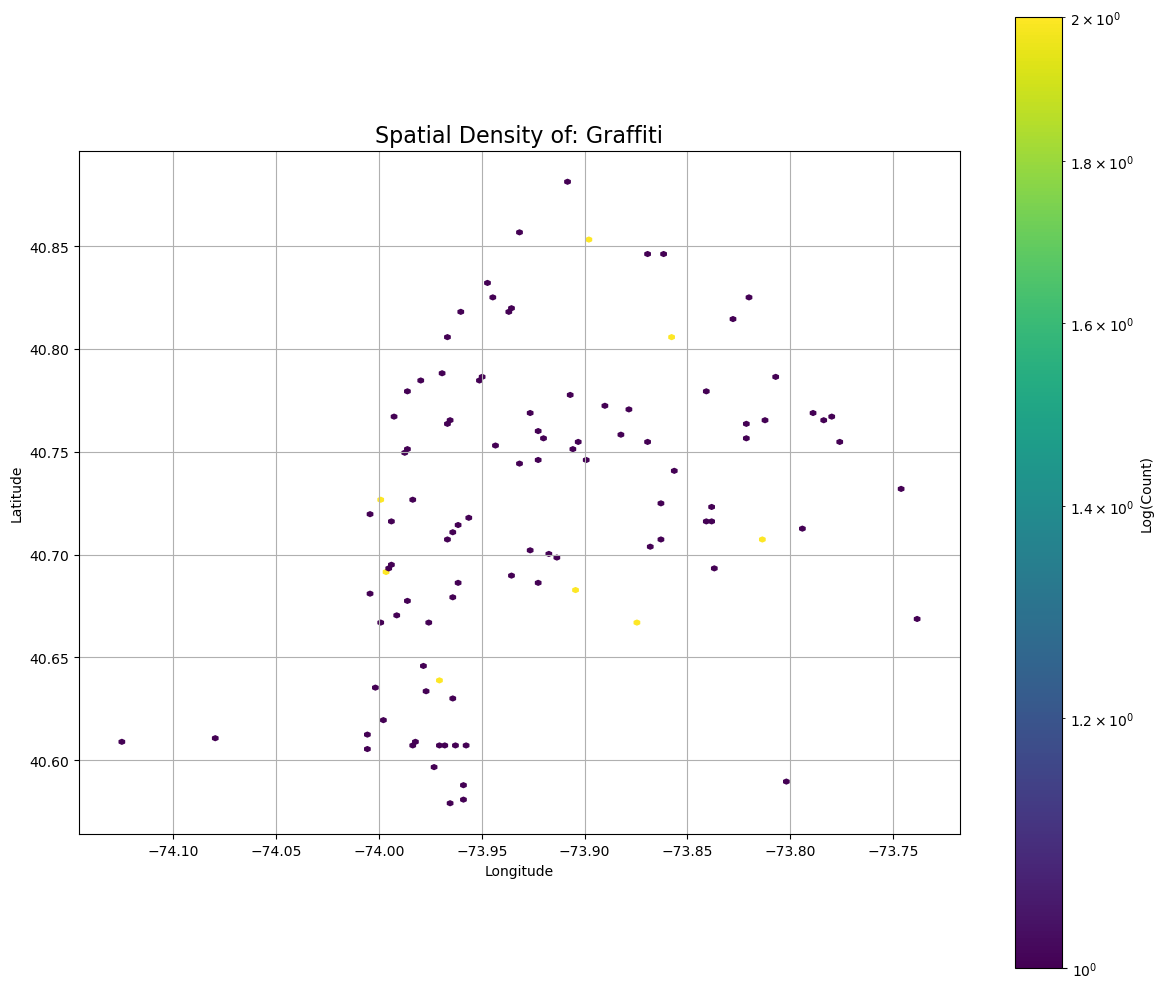

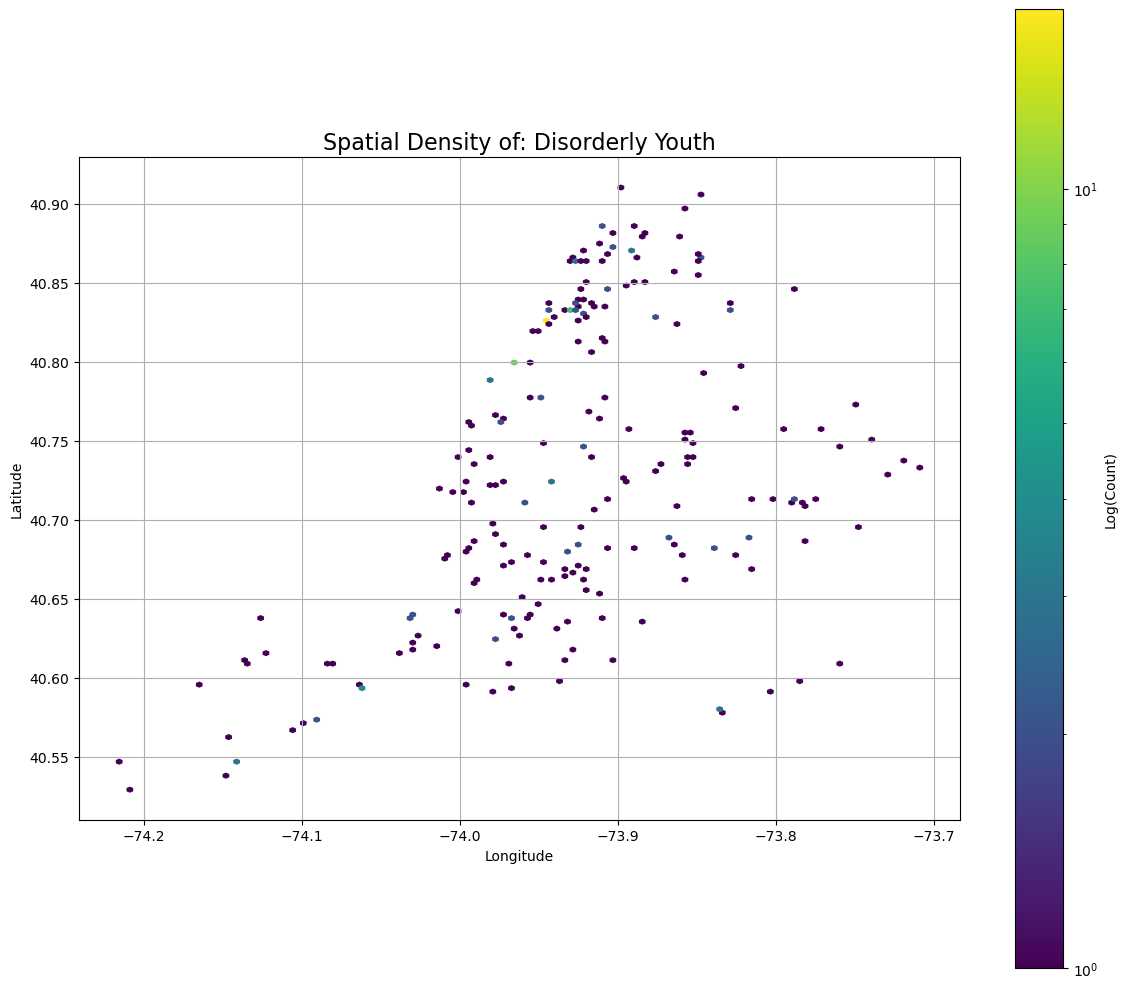

In [53]:
# Spatial Density by Complaint Types
# List of selected complaint types
complaint_types = list(df['Complaint Type'].unique())

# Loop to create a hexbin plot for each complaint type
for complaint in complaint_types:
    subset = df[df['Complaint Type'] == complaint]
    # Plot hexbar with appropriate configurations
    plt.figure(figsize=(12, 10))
    plt.hexbin(
        subset['Longitude'], 
        subset['Latitude'], 
        gridsize=150, 
        cmap='viridis', 
        bins='log', 
        mincnt=1
    )
    plt.colorbar(label='Log(Count)')
    plt.title(f'Spatial Density of: {complaint}', fontsize=16)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    # Fix vertical stretching
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()


***INSIGHT 2: Complaint Distribution by Borough***

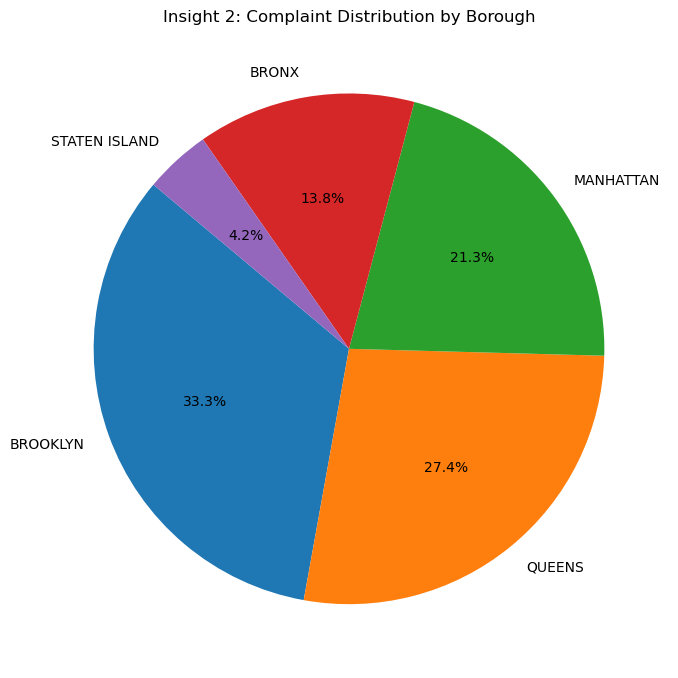

In [55]:
# Storing borough counts
borough_counts = df["Borough"].value_counts()

# Plot pie chart with appropriate configurations
plt.figure(figsize=(7, 7))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Insight 2: Complaint Distribution by Borough")
plt.tight_layout()
plt.show()


***Insight 3: Requests by Hour of Day***

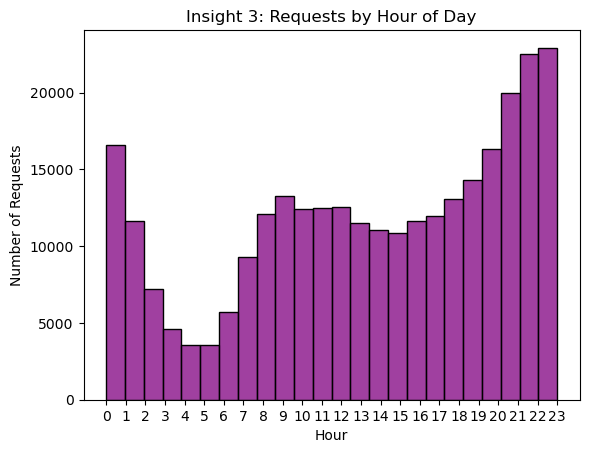

In [57]:
# Created hour of the day
df['Created Hour'] = df['Created Date'].dt.hour

# Histogram of requests by hour
sns.histplot(df['Created Hour'], bins=24, color='purple')
plt.title("Insight 3: Requests by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
plt.xticks(range(24))
plt.show()


***Insight 4: Number of Complaints***

C:\Users\Anshu\AppData\Local\Temp\ipykernel_12536\1526219640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaints.values, y=complaints.index, palette="flare")


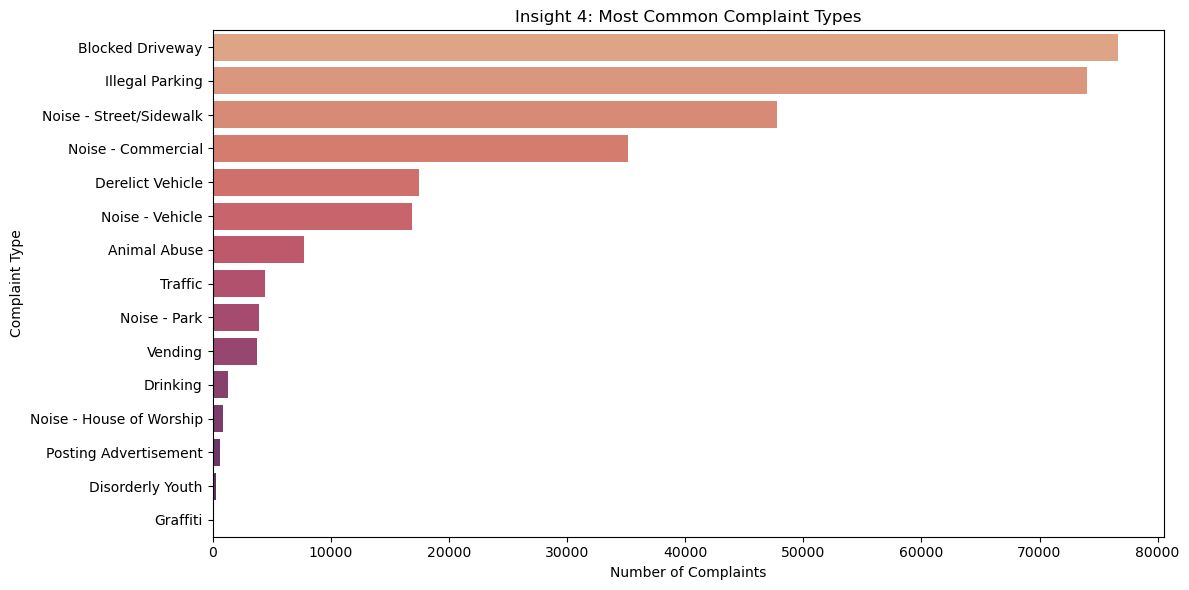

In [59]:
# Number of complaints of each complaint type
complaints = df["Complaint Type"].value_counts()

# Plot bar graph of most common complaint types
plt.figure(figsize=(12, 6))
sns.barplot(x=complaints.values, y=complaints.index, palette="flare")
plt.title("Insight 4: Most Common Complaint Types")
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Type")
plt.tight_layout()
plt.show()


## 10. Arranging the complaint types according to their average 'Request_Closing_Time', categorized by various locations. 

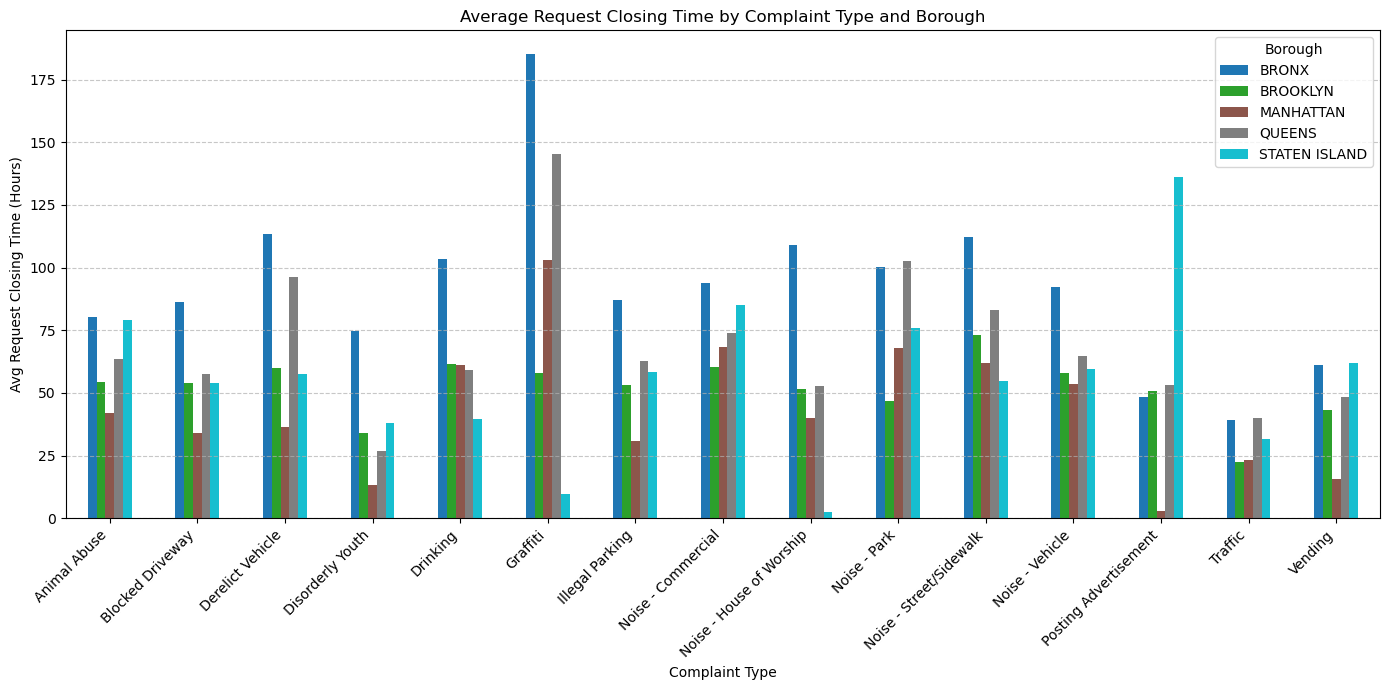

In [64]:
# Create 'Request_Closing_Time' in hours
df = df[df['Request_Closing_Time_In_Hours'] >= 0]

# Group by Complaint Type and Borough and calculate mean closing time
grouped_df = df.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time_In_Hours'].mean().reset_index()

# Pivot the data for visualization
pivot_df = grouped_df.pivot(index='Complaint Type', columns='Borough', values='Request_Closing_Time_In_Hours')

# Select top 10 complaint types for better readability
top_complaints = df['Complaint Type'].value_counts().index
pivot_df = pivot_df.loc[pivot_df.index.intersection(top_complaints)]

# Plotting grouped bar chart
pivot_df.plot(kind='bar', figsize=(14, 7), colormap='tab10')
plt.title('Average Request Closing Time by Complaint Type and Borough')
plt.ylabel('Avg Request Closing Time (Hours)')
plt.xlabel('Complaint Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Borough')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
import plotly.express as px

# Group by Complaint Type and Borough and calculate mean closing time
grouped_df = df.groupby(['Complaint Type', 'Location Type'])['Request_Closing_Time_In_Hours'].mean().reset_index()

# Create a treemap to visualize average request closing times
# broken down by Location Type and Complaint Type
fig = px.treemap(
    grouped_df,
    path=['Location Type', 'Complaint Type'],  # Hierarchical path for grouping
    values='Request_Closing_Time_In_Hours',   # Size of each block based on avg closing time
    color='Request_Closing_Time_In_Hours',    # Color intensity based on avg closing time
    color_continuous_scale='Blues',           # Use a blue color gradient
    title='Avg Request Closing Time by Location Type & Complaint Type'
)

# Customize the figure layout to increase visual clarity
fig.update_layout(
    width=1000,    # Set figure width 
    height=700,    # Set figure height
)

# Display the interactive treemap
fig.show()


## 11. Statistical Tests
***Test 1: Average response time across complaint types is similar or not.***

In [68]:
from scipy.stats import f_oneway

# Use top 10 complaint types for reliability
top_types = df['Complaint Type'].value_counts().index
filtered_df = df[df['Complaint Type'].isin(top_types)]

# Group by complaint type and prepare numeric durations
groups = [
    group['Request_Closing_Time_In_Hours'].dropna()
    for name, group in filtered_df.groupby('Complaint Type')
]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)
print("ANOVA F-statistics:", f_stat)
print("ANOVA p-value:", p_value)
if p_value < 0.05:
    print("Reject Ho: Complaint Type and Average Response Time are associated.")
else:
    print("Fail to reject Ho: No association.")

ANOVA F-statistics: 50.06668185699929
ANOVA p-value: 2.462779063124107e-140
Reject Ho: Complaint Type and Average Response Time are associated.


***Test 2: Type of complaint or service requested and location are related***

In [70]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Complaint Type'], df['Borough'])
contingency_table

Borough                   BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
Complaint Type                                                             
Animal Abuse               1386      2362       1500    1843            544
Blocked Driveway          12540     27830       2036   31179           2110
Derelict Vehicle           1916      5096        527    7959           1744
Disorderly Youth             59        71         66      59             21
Drinking                    181       255        290     348            174
Graffiti                      8        42         22      36              2
Illegal Parking            7689     27076      11902   21587           4807
Noise - Commercial         2394     11306      14286    5986            665
Noise - House of Worship     75       334        188     297             17
Noise - Park                512      1512       1152     626             67
Noise - Street/Sidewalk    8657     13109      20143    4326            793
Noise - Vehicle            3298      5081       5332    2565            350
Posting Advertisement        16        45         41      30            500
Traffic                     344      1081       1523    1283            196
Vending                     375       512       2373     469             25

In [71]:
# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("Chi-square p-value:", p_value)
if p_value < 0.05:
    print("Reject Ho: Complaint Type and Borough are associated.")
else:
    print("Fail to reject Ho: No association.")

Chi-square Statistic: 72029.76460562609
Chi-square p-value: 0.0
Reject Ho: Complaint Type and Borough are associated.


<center><h2>---THE END---</h2></center>